<a href="https://colab.research.google.com/github/AMMISAIDFaical/githubtest/blob/master/FAICAL_TP4_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression: New York City Taxi Trip Duration

For the following tasks, you will work with the dataset from the [Playground Prediction Competition: New York City Taxi Trip Duration](https://www.kaggle.com/competitions/nyc-taxi-trip-duration/code?competitionId=6960&sortBy=voteCount).

Based on individual trip attributes, the duration of the trip should be predicted.

**Data fields**

* `id` - a unique identifier for each trip
* `vendor_id` - a code indicating the provider associated with the trip record
* `pickup_datetime` - date and time when the meter was engaged
* `dropoff_datetime` - date and time when the meter was disengaged
* `passenger_count` - the number of passengers in the vehicle (driver entered value)
* `pickup_longitude` - the longitude where the meter was engaged
* `pickup_latitude` - the latitude where the meter was engaged
* `dropoff_longitude` - the longitude where the meter was disengaged
* `dropoff_latitude` - the latitude where the meter was disengaged
* `store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* `trip_duration` - duration of the trip in seconds (**target variable**)

**Import libraries**

*   [Pandas](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas) provides data structures to work with relational (tabular) data.
*   [NumPy](https://numpy.org/) provides numerical computing tools (mathematical functions, linear algebra routines, etc.)
*   [Matplotlib](https://matplotlib.org/) allows to create visualizations.
*   [Seaborn](https://seaborn.pydata.org/) is based on Matplotlib. It provides a high-level interface for drawing graphics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some settings for graphics
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,4)})

# use this value where it is possible to indicate the random state
RANDOM_STATE = 42

## Task 1. Import data

* Read data into a pd.DataFrame object
* Display table dimensions and a few rows
* Display descriptive statistics
* Check if there are any columns containing unique values for each row. If so, drop them.
* `dropoff_datetime` variable is added only to train data and thus cannot be used by the predictive model. Drop this feature.
* `pickup_datetime` contains date and time when the meter was engaged. Check the type of this feature and change it to `datetime` if it is another type.
* Split data into `train` and `test`, avec 30% de données pour les tests.


In [3]:
# %%capture
!wget https://github.com/eishkina-estia/ML2023/raw/main/data/New_York_City_Taxi_Trip_Duration.zip
data = pd.read_csv('/content/New_York_City_Taxi_Trip_Duration.zip', compression='zip')

--2023-10-27 09:37:34--  https://github.com/eishkina-estia/ML2023/raw/main/data/New_York_City_Taxi_Trip_Duration.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eishkina-estia/ML2023/main/data/New_York_City_Taxi_Trip_Duration.zip [following]
--2023-10-27 09:37:35--  https://raw.githubusercontent.com/eishkina-estia/ML2023/main/data/New_York_City_Taxi_Trip_Duration.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67007897 (64M) [application/zip]
Saving to: ‘New_York_City_Taxi_Trip_Duration.zip.5’

New_York_City_Taxi_ 100%[===================>]  63.90M   306MB/s    in 0.2s    

2023-10-27 09

In [4]:
display(data.shape)
display(data.head(2))

(1458644, 11)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [5]:
display(data.describe())
display(data.dtypes)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
# Step 1: Check for columns with unique values
unique_columns = [col for col in data.columns if data[col].nunique() == data.shape[0]]

# Step 2: Drop the identified columns with unique values
data = data.drop(columns=unique_columns)

# Display the resulting DataFrame
print(data.shape)

(1458644, 10)


In [8]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

droping col **dropoff_datetime**

In [9]:
data = data.drop('dropoff_datetime',axis=1)

In [10]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
display(data.dtypes)

vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [11]:
y = data['trip_duration']
X = data.drop('trip_duration',axis=1)

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (30% for testing, 70% for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Task 2. Target variable

The target variable is `trip_duration`. Its values should be predicted by a ML model.

### 2.1. Distribution

Check the distribution of the target variable values.

In [13]:
# Create a displot
# sns.displot(data=data, x="trip_duration", kind="kde")
# plt.xlabel('Trip Duration (in seconds)')  # Set a clear x-axis label
# plt.title('Trip Duration Distribution')
# plt.show()

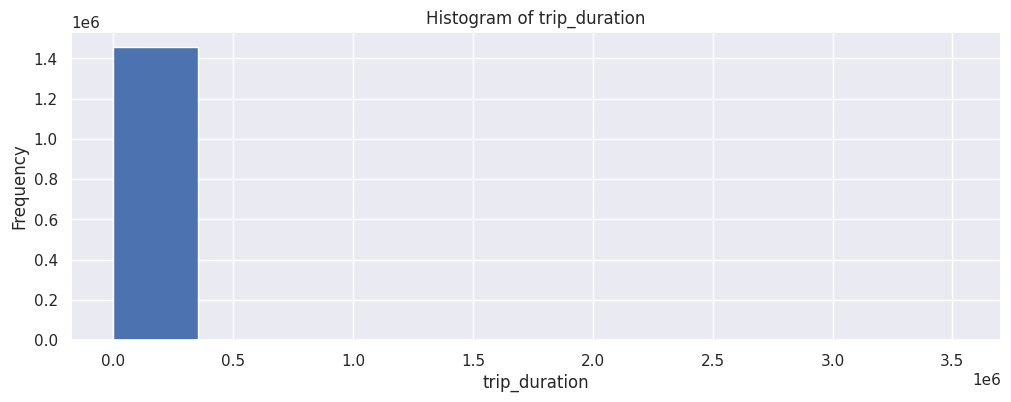

In [14]:
plt.hist(data['trip_duration'], bins=10)
plt.xlabel('trip_duration')
plt.ylabel('Frequency')
plt.title('Histogram of trip_duration')
plt.show()

Add your interpretation of the results:

<font color='yellowgreen'>all trip durations are  in the range 0.0-0.7x1e6 are the</font>

### 2.2. Evaluation metric

The evaluation metric for this competition is Root Mean Squared Logarithmic Error:

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Question**: How do you think, why it is RMSLE and not RMSE ([reading](https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a))?

<font color='yellowgreen'>RMSE measures the absolute error and treats underestimation and overestimation equally, making it sensitive to outliers. RMSLE, on the other hand, measures relative error, is more robust to outliers, penalizes underestimation more severely, and emphasizes the relative difference between predicted and actual values.</font>

### 2.3. Target transformation

The logarithm of the target variable has some useful properties. To see this, create a new variable `log_trip_duration` (use the function `np.log1p`) and display the histogram of this transformed target variable. Delete the column with the original target variable.

In [67]:
data_tdlog = data
data_tdlog['log_trip_duration'] =np.log1p(data_tdlog['trip_duration'])
# Create a new DataFrame with both columns side by side
# side_by_side_df = data_tdlog[['log_trip_duration', 'trip_duration']]
# print(side_by_side_df)
data_tdlog = data_tdlog.drop('trip_duration', axis=1)
data_tdlog.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,6.466978e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,7.957595e-01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,6.931472e-01
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,5.986452e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.496775e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,6.981006e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.507575e+01


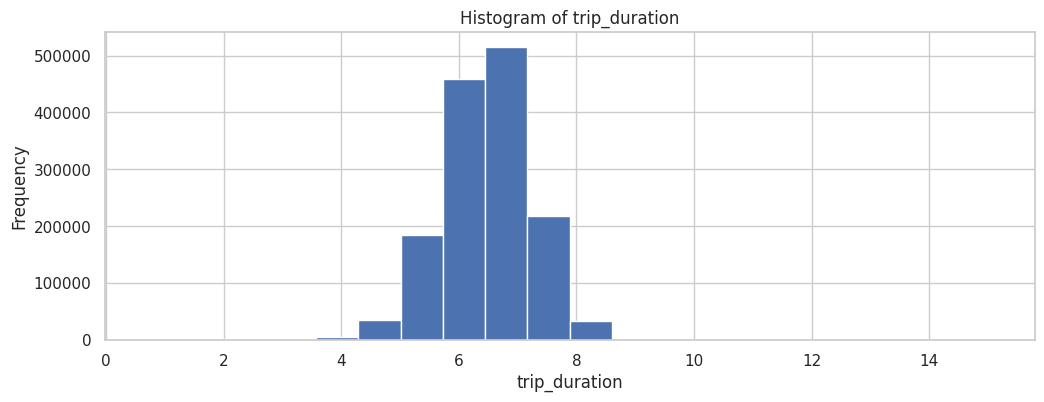

In [68]:
plt.hist(data_tdlog['log_trip_duration'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('trip_duration')
plt.ylabel('Frequency')
plt.title('Histogram of trip_duration')
plt.show()

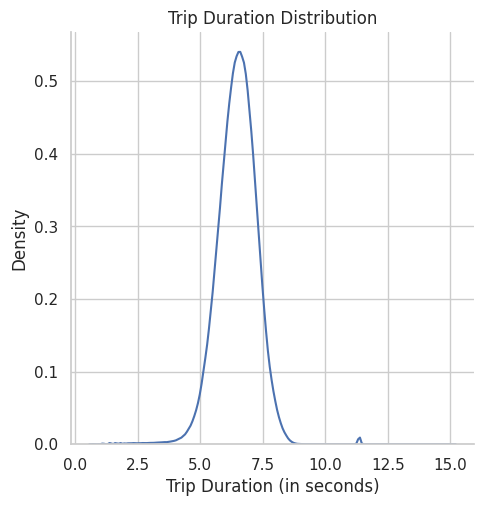

In [69]:
# Create a displot
sns.displot(data=data_tdlog, x="log_trip_duration", kind="kde")
plt.xlabel('Trip Duration (in seconds)')  # Set a clear x-axis label
plt.title('Trip Duration Distribution')
plt.show()

**the target value after the log we notice is that is normally distributed is centred arround the mean "6.466978e+00"**

## Task 3. Baseline

To have some starting point, calculate the value of the RMSLE metric for the best constant prediction. What value could be considered as the best constant prediction?

***The best constant score for RMSLE is the exponential of the mean of the log target values. It can be expressed as a formula in the following way.***

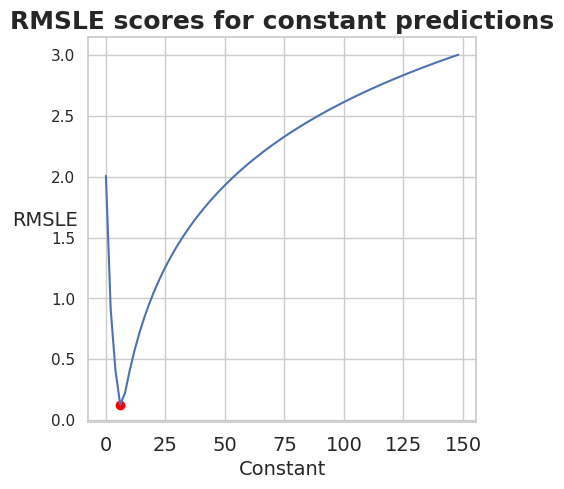

In [70]:
# For calculating the metric
from sklearn.metrics import mean_squared_log_error

def RMSLE(y_true: np.array, y_pred: np.array) -> np.float64:
    return mean_squared_log_error(y_true, y_pred, squared=False)

const_rmsles = dict()

for i in range(75):
    const = i * 2
    rmsle = round(RMSLE(data_tdlog['log_trip_duration'], np.full(len(data_tdlog), const)), 5)
    const_rmsles[const] = rmsle

xs = list(const_rmsles.keys())
ys = list(const_rmsles.values())

pd.DataFrame(ys, index=xs).plot(figsize=(5, 5), legend=None)
plt.scatter(min(const_rmsles, key=const_rmsles.get), sorted(ys)[0], color='red')
plt.title("RMSLE scores for constant predictions", fontsize=18, weight='bold')
plt.xticks(fontsize=14)
plt.xlabel("Constant", fontsize=14)
plt.ylabel("RMSLE", rotation=0, fontsize=14);

In [71]:
# display(data_tdlog.describe())
# Formulate the best constant for this metric
best_const = np.mean(data_tdlog['log_trip_duration'])
print(best_const)

6.466978409297406


## Task 4. `pickup_datetime`

### 4.1. Number of trips ~ date

How many trips are there every day? Display the relationship between the number of trips and the date (you can use `sns.countplot` function).

In [72]:
# Assuming you have a DataFrame with a "date" column
# data_tdlog['pickup_datetime'] = pd.to_datetime(data_tdlog['pickup_datetime'])
data_tdlog['date'] = data_tdlog['pickup_datetime'].dt.date

# Sort the data by the "date" column
sorted_data = data_tdlog.sort_values(by='date')

# Calculate the index to split the data into two halves
half_count = len(sorted_data) // 2

# Create two separate DataFrames for the first and second halves
first_half_df = sorted_data.iloc[:half_count].copy()
second_half_df = sorted_data.iloc[half_count:].copy()

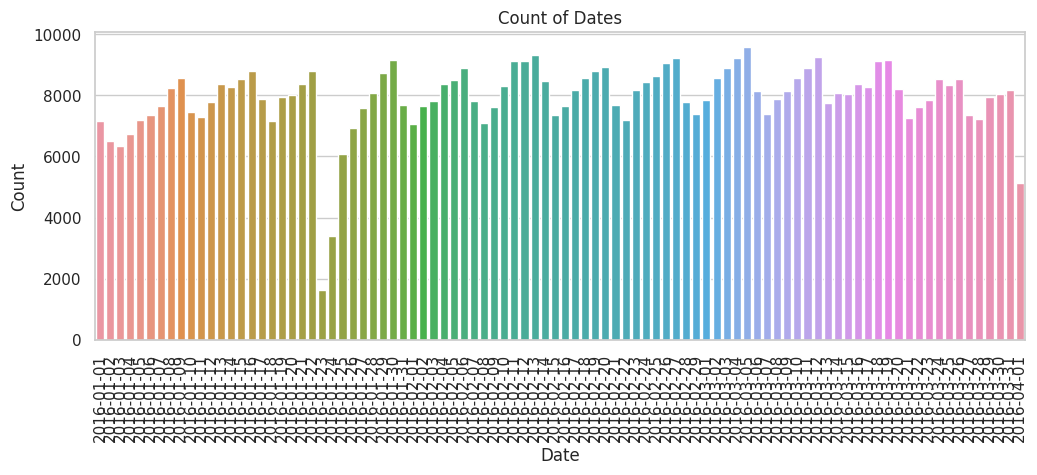

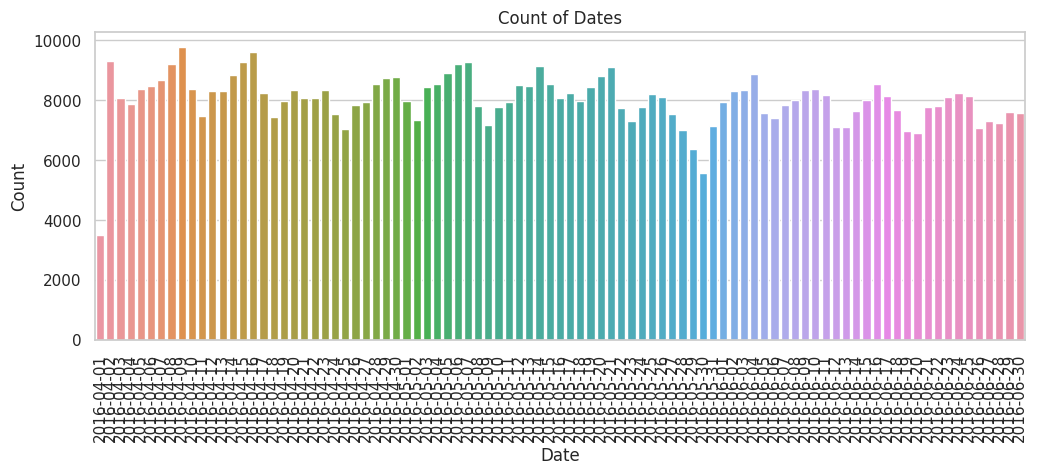

In [73]:
sns.countplot(data=first_half_df, x='date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Dates')
plt.xticks(rotation=90)  # Adjust rotation as needed
plt.show()

# Sort the data by the "date" column
sns.countplot(data=second_half_df, x='date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Dates')
plt.xticks(rotation=90)  # Adjust rotation as needed
plt.show()


**Question**: You might have noticed 2 periods with too few trips compared to the usual number of trips. Check the corresponding dates and see if there were any specific events in New York on those dates that might explain these low values.

<font color='yellowgreen'>Au total, il est tombé 56 centimètres de neige à Washington et près de 64 à New York ... 23 janvier 2016 -24  | REUTERS/Shannon Stapleton. Times Square</font>

### 4.2. Number of trips ~ day of the week, hour of the day

Display two additional graphs: number of trips per weekday and number of journeys per hour of the day.

Display the number of trips per hour of the day and weekday (you can use the `sns.relplot` function).

For weekdays, display the names and not the numbers.

In [74]:
sorted_datedf = data_tdlog.sort_values(by='date')

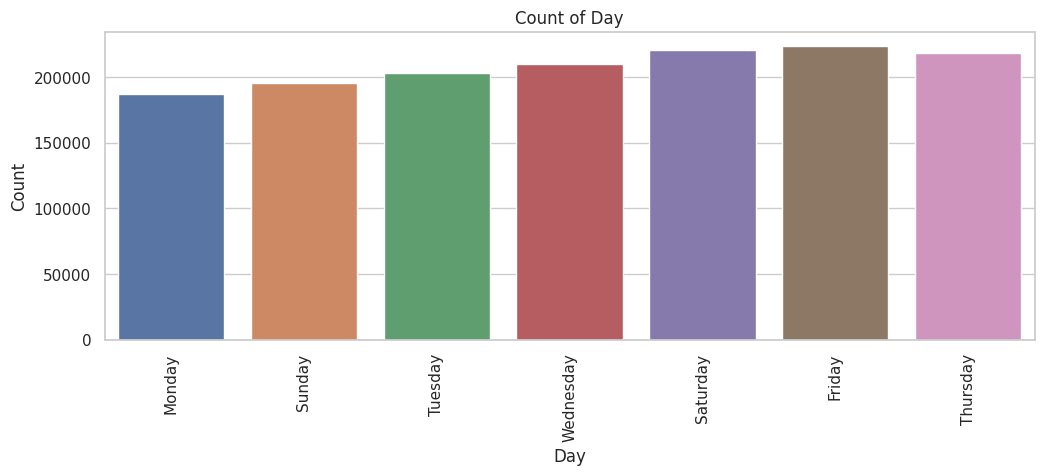

In [75]:
# Add a new column to the DataFrame to store the day of the week
data_tdlog['day'] = data_tdlog['pickup_datetime'].dt.day_name()
sns.countplot(data=data_tdlog, x='day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Day')
plt.xticks(rotation=90)
plt.show()

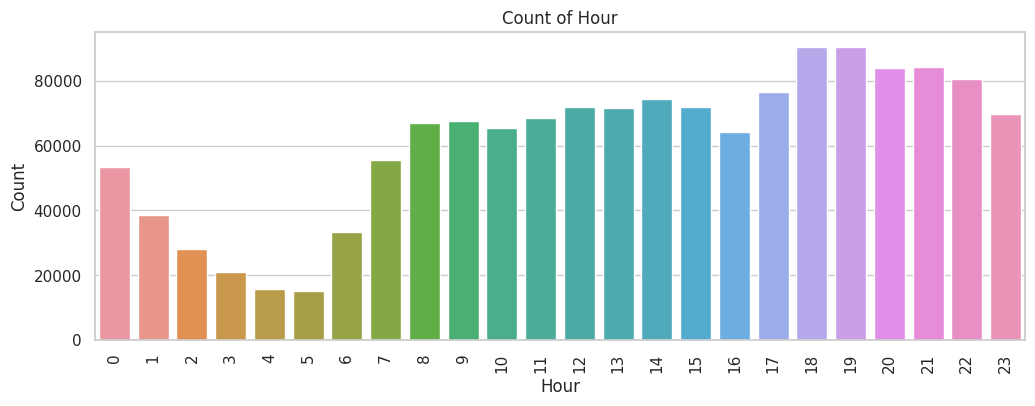

In [76]:
# Add a new column to the DataFrame to store the day of the week
data_tdlog['hour'] = data_tdlog['pickup_datetime'].dt.hour
sns.countplot(data=data_tdlog, x='hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of Hour')
plt.xticks(rotation=90)  # Adjust rotation as neededx
plt.show()

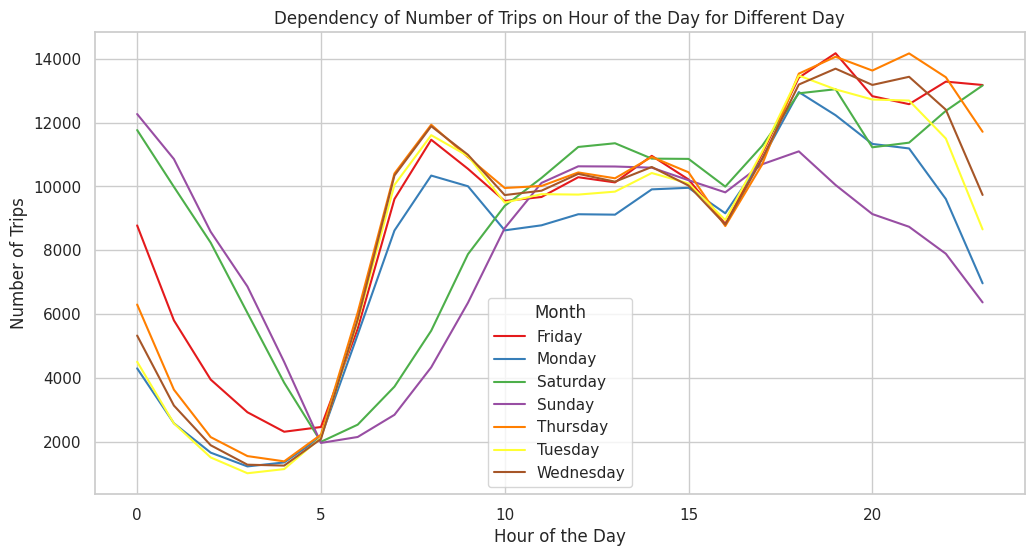

In [77]:
hourly_trip_counts = data_tdlog.groupby(['day', 'hour']).size().reset_index(name='trip_count')

# Create a line plot with different colors for each month
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=hourly_trip_counts, x="hour", y="trip_count", hue="day", palette="Set1")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.legend(title="Month")
plt.title("Dependency of Number of Trips on Hour of the Day for Different Day")
plt.show()

### 4.3. Number of trips ~ hour of the day for different months

Display on a single graph the dependency of the number of trips and the hour of the day for different months (one curve per month). The curves corresponding to different months should be displayed in different colours.

Also display a graph showing the dependency of the number of trips on the hour of the day for different days of the week (one curve per day of the week).

In [78]:
data_tdlog.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,date,day,hour
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,2016-03-14,Monday,17
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,2016-06-12,Sunday,0
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,2016-01-19,Tuesday,11
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2016-04-06,Wednesday,19
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,2016-03-26,Saturday,13


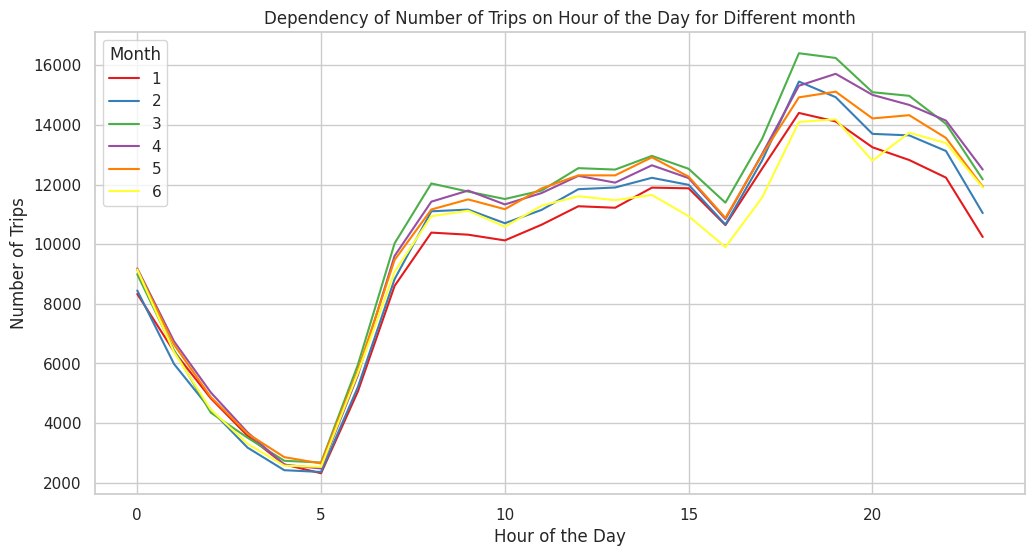

In [79]:
data_tdlog['month'] = data_tdlog['pickup_datetime'].dt.month

hourly_trip_counts = data_tdlog.groupby(['month', 'hour']).size().reset_index(name='trip_count')

# Create a line plot with different colors for each month
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=hourly_trip_counts, x="hour", y="trip_count", hue="month", palette="Set1")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.legend(title="Month")
plt.title("Dependency of Number of Trips on Hour of the Day for Different month")
plt.show()

Add your interpretation of the results.

<font color='yellowgreen'>your text here</font>

### 4.4. Trip duration ~ date, day of the week, hour of the day

Display the distribution of the average target value by the date, the day of the week, and the time of the day.

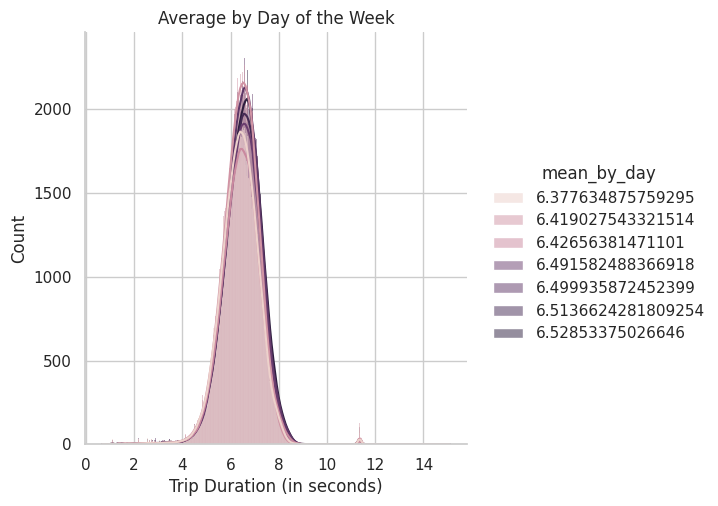

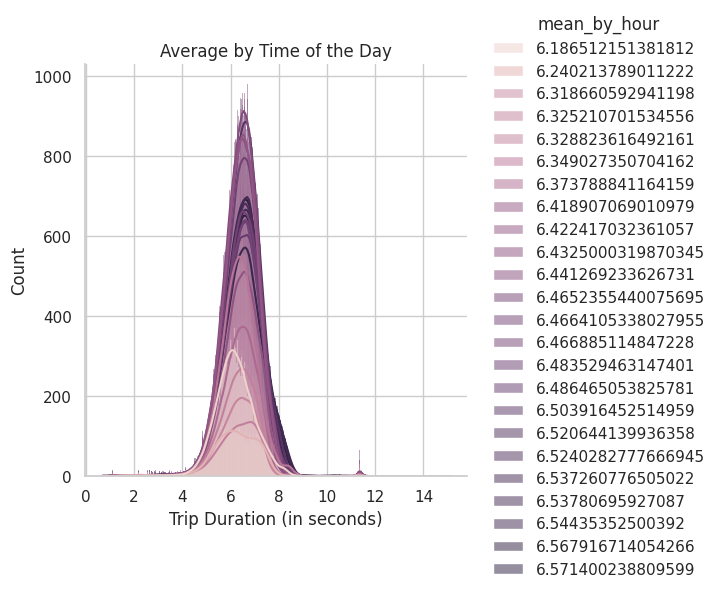

In [80]:
# Calculate means for different groups
data_tdlog['mean_by_date'] = data_tdlog.groupby('date')['log_trip_duration'].transform('mean')
data_tdlog['mean_by_day'] = data_tdlog.groupby('day')['log_trip_duration'].transform('mean')
data_tdlog['mean_by_hour'] = data_tdlog.groupby('hour')['log_trip_duration'].transform('mean')

sns.displot(data=data_tdlog, x='log_trip_duration', hue='mean_by_day', kde=True)
plt.xlabel('Trip Duration (in seconds)')
plt.title('Average by Day of the Week')
plt.show()

sns.displot(data=data_tdlog, x='log_trip_duration', hue='mean_by_hour', kde=True)
plt.xlabel('Trip Duration (in seconds)')
plt.title('Average by Time of the Day')
plt.show()

**Question**: Display the graphs showing the dependency of the target variable on the day of the week and the time of day. What happens to the target variable during the two special periods seen before? Why? Are there any trends in the graph of `log_trip_duration` in relation to the day of the year?

<font color='yellowgreen'>your text here</font>

### 4.5. New features

Add new variables based on `pickup_datetime`:

1.   Day of week
2.   Month
3.   Time of day
4.   If the period is "abnormal" (two binary variables for two periods detected)
5.   Day of the year

In [81]:
# import pandas as pd

# Convert 'date' column to datetime data type
data_tdlog['date'] = pd.to_datetime(data_tdlog['date'])

# Convert 'day' column to categorical data type
data_tdlog['day'] = data_tdlog['day'].astype('category')

In [82]:
data_tdlog['trip_count'] = data_tdlog.groupby(['month', 'hour']).transform('size')
data_tdlog['trip_count']

0          13537
1           9150
2          10653
3          15714
4          12502
           ...  
1458639    12064
1458640     8600
1458641     5603
1458642    11874
1458643    12646
Name: trip_count, Length: 1458644, dtype: int64

In [83]:
data_tdlog['abnormal'] = 'NORMAL'  # Set a default value
data_tdlog.loc[data_tdlog['trip_count'] < 4000, 'abnormal'] = 'NOT-NORMAL'

# Print unique values of the 'abnormal' column
print(data_tdlog['abnormal'].unique())


['NORMAL' 'NOT-NORMAL']


In [84]:
data_tdlog['day_of_year'] = data_tdlog['pickup_datetime'].dt.dayofyear
data_tdlog.head(2)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,date,day,hour,month,mean_by_date,mean_by_day,mean_by_hour,trip_count,abnormal,day_of_year
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,2016-03-14,Monday,17,3,6.445390,6.426564,6.537261,13537,NORMAL,74
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,2016-06-12,Sunday,0,6,6.421458,6.377635,6.422417,9150,NORMAL,164


In [85]:
data_tdlog['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [110]:
import pandas as pd

# Assuming 'pickup_datetime' is in a format like 'YYYY-MM-DD HH:MM:SS'
# You might need to adjust the format to match your actual data
# data_tdlog['pickup_datetime'] = pd.to_datetime(data_tdlog['pickup_datetime']).values.astype(date)

In [112]:
data_tdlog.head(3)

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,hour,month,...,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,store_and_fwd_flag_N,store_and_fwd_flag_Y,abnormal_NORMAL,abnormal_NOT-NORMAL
0,2,1.457976e+18,1,-73.982155,40.767937,-73.964630,40.765602,6.122493,17,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1.465692e+18,1,-73.980415,40.738564,-73.999481,40.731152,6.498282,0,6,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,1.453203e+18,1,-73.979027,40.763939,-74.005333,40.710087,7.661527,11,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


**Question**: Which of the variables should be considered as categorical and which as numerical? Why?

<font color='yellowgreen'>*abnormal, store_and_fwd_flag, day categorical others numerical*</font>

### 4.6. Ridge regression

* Use only the features we have worked with up to now.
* Encode categorical features using `OneHotEncoder`.
* Scale numerical features using the `StandardScaler`.
* Train Ridge regression with the default settings.

In [90]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # sparse=False for a non-sparse matrix

# Fit and transform the encoder on the 'store_and_fwd_flag' column
encoded_data = encoder.fit_transform(data_tdlog[['abnormal']]) #date

# Create a new DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['abnormal']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data_tdlog = pd.concat([data_tdlog, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [126]:
# data_tdlog = data_tdlog.drop('pickup_datetime',axis=1)
data_tdlog

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,hour,month,mean_by_date,...,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,store_and_fwd_flag_N,store_and_fwd_flag_Y,abnormal_NORMAL,abnormal_NOT-NORMAL
0,2,1,-73.982155,40.767937,-73.964630,40.765602,6.122493,17,3,6.445390,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,6.498282,0,6,6.421458,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,7.661527,11,1,6.459165,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,6.063785,19,4,6.486666,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,6.077642,13,3,6.398234,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,6.658011,13,4,6.514989,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,6.486161,7,1,6.289863,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,6.639876,6,4,6.578074,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,5.924256,15,1,6.355708,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_tdlog)

data_tdlog = pd.DataFrame(scaler.transform(data_tdlog), columns=scaler.get_feature_names_out())


In [129]:
data_tdlog

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,hour,month,mean_by_date,...,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,store_and_fwd_flag_N,store_and_fwd_flag_Y,abnormal_NORMAL,abnormal_NOT-NORMAL
0,0.932380,-0.505637,-0.122261,0.517494,0.124369,0.384575,-0.432902,0.530263,-0.307440,-0.276994,...,2.604388,-0.422421,-0.393256,-0.419833,-0.401793,-0.410256,0.074471,-0.074471,0.191672,-0.191672
1,-1.072524,-0.505637,-0.097727,-0.375819,-0.368970,-0.575303,0.039338,-2.126116,1.477173,-0.584067,...,-0.383967,-0.422421,2.542875,-0.419833,-0.401793,-0.410256,0.074471,-0.074471,0.191672,-0.191672
2,0.932380,-0.505637,-0.078143,0.395910,-0.451805,-1.162220,1.501143,-0.407283,-1.497182,-0.100248,...,-0.383967,-0.422421,-0.393256,-0.419833,2.488842,-0.410256,0.074471,-0.074471,0.191672,-0.191672
3,0.932380,-0.505637,-0.515558,-0.941274,-0.549976,-1.256071,-0.506677,0.842778,0.287431,0.252613,...,-0.383967,-0.422421,-0.393256,-0.419833,-0.401793,2.437505,0.074471,-0.074471,0.191672,-0.191672
4,0.932380,-0.505637,0.006112,1.286091,0.006974,0.855957,-0.489264,-0.094768,-0.307440,-0.882060,...,-0.383967,2.367307,-0.393256,-0.419833,-0.401793,-0.410256,0.074471,-0.074471,0.191672,-0.191672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,0.932380,1.777048,-0.122907,-0.164208,-0.304279,-0.324041,0.240063,-0.094768,0.287431,0.616019,...,-0.383967,-0.422421,-0.393256,-0.419833,-0.401793,-0.410256,0.074471,-0.074471,0.191672,-0.191672
1458640,-1.072524,-0.505637,-0.387292,-0.107709,0.045746,1.246775,0.024106,-1.032313,-1.497182,-2.272565,...,-0.383967,-0.422421,2.542875,-0.419833,-0.401793,-0.410256,0.074471,-0.074471,0.191672,-0.191672
1458641,0.932380,-0.505637,0.202491,0.543713,-0.439062,-1.237896,0.217274,-1.188570,0.287431,1.425467,...,-0.383967,-0.422421,-0.393256,-0.419833,-0.401793,-0.410256,0.074471,-0.074471,0.191672,-0.191672
1458642,-1.072524,-0.505637,-0.121185,-0.056547,-0.017218,0.147874,-0.682019,0.217747,-1.497182,-1.427707,...,-0.383967,-0.422421,-0.393256,-0.419833,2.488842,-0.410256,0.074471,-0.074471,0.191672,-0.191672


In [136]:
from sklearn.model_selection import train_test_split
data_ex_1 = data_tdlog
y = data_ex_1['log_trip_duration']
X = data_ex_1.drop('log_trip_duration',axis=1)

# Split the data into training and testing sets (30% for testing, 70% for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [137]:
# define an empty dictionary to save performance for different linear regression models
reg_results = {}

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import Bunch

MODELNAME = 'baseline'
reg_results[MODELNAME] = Bunch()

# Create a class instance
lr = LinearRegression()

# Train the model using train data
lr.fit(X_train, y_train)

# save model and model parameters
reg_results[MODELNAME].model = lr
reg_results[MODELNAME].coef_ = pd.DataFrame({'modelname': MODELNAME, 'feature': lr.feature_names_in_, 'coef': lr.coef_})

# Make predictions for train and test data
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# save model performance
reg_results[MODELNAME].mse_train = mean_squared_error(y_train, y_pred_train)
reg_results[MODELNAME].mse_test = mean_squared_error(y_test, y_pred_test)
reg_results[MODELNAME].r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {reg_results[MODELNAME].mse_train:.2f}')
print(f'MSE on test data: {reg_results[MODELNAME].mse_test:.2f}')
print(f"R^2 on test data: {reg_results[MODELNAME].r2_test:.2f}")

MSE on train data: 0.92
MSE on test data: 1.12
R^2 on test data: -0.12


In [139]:
from sklearn.linear_model import Ridge

best_score = 10000

# alpha is a hyperparameter for Ridge Linear Regression
for alpha in np.arange(1e-5, 2.1, 0.25):

    lr_ridge = Ridge(alpha=alpha)
    lr_ridge.fit(X_train, y_train)

    y_pred_train = lr_ridge.predict(X_train)
    y_pred_test = lr_ridge.predict(X_test)

    score_train = mean_squared_error(y_train, y_pred_train)
    score_test = mean_squared_error(y_test, y_pred_test)

    print(f'alpha={alpha}')
    print(f'MSE on train data: {score_train:.2f}')
    print(f'MSE on test data: {score_test:.2f}')
    print(lr_ridge.coef_,'\n')

    if score_test < best_score:
      best_score = score_test
      best_lr_ridge = lr_ridge

alpha=1e-05
MSE on train data: 0.92
MSE on test data: 1.12
[ 0.01477101  0.01654515  0.21758567 -0.10706848  0.11697346 -0.10201896
 -0.01465899  0.00473839  0.0996091   0.00193881  0.11343776  0.00994256
 -0.0056864   0.00159961 -0.00322882  0.00204999 -0.0017413   0.00049835
 -0.00036568  0.00088217 -0.00522523  0.00522534 -0.00155192  0.00155189] 

alpha=0.25001
MSE on train data: 0.92
MSE on test data: 1.12
[ 0.01477101  0.01654515  0.21758554 -0.10706847  0.11697344 -0.10201893
 -0.01465898  0.00473829  0.09960902  0.00194762  0.11343772  0.00994256
 -0.00568626  0.00159817 -0.00322606  0.00205339 -0.00173571  0.00049523
 -0.00036658  0.00087996 -0.00522529  0.00522529 -0.0015519   0.0015519 ] 

alpha=0.50001
MSE on train data: 0.92
MSE on test data: 1.12
[ 0.01477101  0.01654515  0.21758541 -0.10706846  0.11697341 -0.1020189
 -0.01465897  0.00473818  0.09960894  0.00194764  0.11343768  0.00994256
 -0.00568612  0.00159818 -0.00322607  0.00205338 -0.00173572  0.00049524
 -0.0003665

In [140]:
MODELNAME = 'ridge'
reg_results[MODELNAME] = Bunch()

# save model and model parameters
reg_results[MODELNAME].model = best_lr_ridge
reg_results[MODELNAME].coef_ = pd.DataFrame({'modelname': MODELNAME, 'feature': best_lr_ridge.feature_names_in_, 'coef': best_lr_ridge.coef_})

# save model performance
y_pred_test = best_lr_ridge.predict(X_test)
reg_results[MODELNAME].r2_test = r2_score(y_test, y_pred_test)

In [141]:
reg_results[MODELNAME].r2_test

-0.11725159681994213

## Task 5. Coordinates analysis

Below you will find the definition of the `show_circles_on_map` function, which displays the start and end points on a map. Examples of how to call this function can also be found below. We don't pass all the available data to the function, but only a sample, to reduce execution time.

### 5.1. Folium

Install `folium` library to visualize geographical maps.

In [121]:
!pip install folium

In [122]:
import folium

m = folium.Map(location=(43.44626936228708, -1.553731439410459), zoom_start=50)
m

In [123]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [124]:
show_circles_on_map(data_tdlog.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

**Question**: Are there any points that are very different from the majority of the points?

<font color='yellowgreen'>your text here</font>

### 5.2. Distance estimation

The duration of the trip depends on the distance and the time: $t = s / v_{\text{mean}}$. Distance would be very important for predicting duration. We cannot calculate the exact distance corresponding to a trip, but we can estimate it by calculating the minimum distance between the departure and arrival points. To correctly calculate the distance between two points on Earth, we can use the `haversine` function. Add a new column with the distance calculated using the `haversine` function (see the code below).

In [ ]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [ ]:
data_ex_1[]

Since the target variable is the logarithm of the trip duration and in order to try to build a linear model to predict these values, it is necessary to calculate the logarithm of the distance: $\log t = \log s - \log{v_{\text{mean}}}$. Add a new feature with the logarithm of `haversine`.

In [ ]:
# your code here

Check whether the logarithm of the haversine distance correlates better with the target variable than the distance itself.

In [ ]:
# your code here

### 5.3. Speed estimation

Calculate the average speed for each trip in the training sample: `haversine` divided by `trip_duration`. Display the distribution of average speed values.

In [ ]:
# your code here

As you can see from this histogram, there are outliers. Filter the data, for example by removing values greater than a certain percentile, and display again the distribution.

In [ ]:
# your code here

For each tuple (day of the week, time of day) calculate the median speed. Display a heatmap with the results.

In [ ]:
# your code here

**Warning** : The variable containing the speed must be dropped before training a linear model (cf. https://en.wikipedia.org/wiki/Multicollinearity).

**Question**: How can you interpret the graph above: when the speed is minimum and when it is maximum?

<font color='yellowgreen'>your text here</font>

Add new binary variables `high traffic trip` and `high speed trip` (don't use speed feature to calculate the values of these features).

In [ ]:
# your code here

### 5.4. Outliers

On the map you can see some points that are quite far from Manhattan. Add new features: whether the trip starts or ends at such a point.

In [ ]:
# your code here

For each new feature, display box plots showing the distribution of the logarithm of the trip duration.

In [ ]:
# your code here

**Question**: Add your interpretation: could these variables be useful?

<font color='yellowgreen'>your text here</font>

### 5.5. Ridge regression

* Use only the features we have worked with up to now.
* Encode categorical features using `OneHotEncoder`.
* Scale numerical features using the `StandardScaler`.
* Train Ridge regression with the default settings.

In [ ]:
# your code here

## Task 6. Other features analysis

### 6.1. `vendor_id`, `passenger_count`, `store_and_fwd_flag`

There are 3 more variables: `vendor_id`, `passenger_count` and `store_and_fwd_flag`. Display the unique values for each of them and the corresponding number of trips.

Display the distribution of the logarithm of the trip duration by the values of the following variables: `vendor_id`, `passenger_count` and `store_and_fwd_flag`.

**Question**: Add your interpretation of these graphs: do you think these features could be useful for the model?

<font color='yellowgreen'>your text here</font>

Change the `vendor_id` and `store_and_fwd_flag` variables so that their values are: $\{0;1\}$.

In [ ]:
# your code here

### 6.2. Ridge regression

* Use only the features we have worked with up to now.
* Encode categorical features using `OneHotEncoder`.
* Scale numerical features using the `StandardScaler`.
* Train Ridge regression with the default settings.

In [ ]:
# your code here

If adding new variables didn't improve the quality of the model, you can drop them.

## Task 7. Improve the model

### 7.1. Cleaning data

There are outliers in the data: trips with too short duration or too long distance. Display the distribution of the abovementionned variables, select observations corresponding to the values of these variables that could be considered as outliers and drop them from the sample.

Note that although these values appear to be outliers, the test sample will most likely contain objects with the "outlier" values of the target variable and/or the other variables. As a result, it is possible that cleaning up the training sample will lead to a deterioration in the quality of the test. However, it is always preferable to remove outliers to make the model more interpretable.

In [ ]:
# your code here

There are many categorical variables. Some categories are very rare and using them can lead to overfitting. Try to combine (very) rare categories into fewer categories.

In [ ]:
# your code here

Train the model on clean data and evaluate it.

In [ ]:
# your code here

### 7.2. Ridge vs. Lasso

Tune hyperparameters of `Lasso` and `Ridge` algorithms. Which algorithms gives the best result?

In [ ]:
# your code here

### 7.3. DecisionTreeRegressor and ensembles

Use DecisionTreeRegressor and ensembles of trees (Random Forest and Gradient Boosting) to try to improve the model.



In [ ]:
# your code here